<a href="https://colab.research.google.com/github/victorm0202/emed22/blob/main/10_manifolds_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2022 <center>


## t-SNE. Ejemplo 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
plt.rcParams["figure.figsize"] = (12,8)
#reset:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


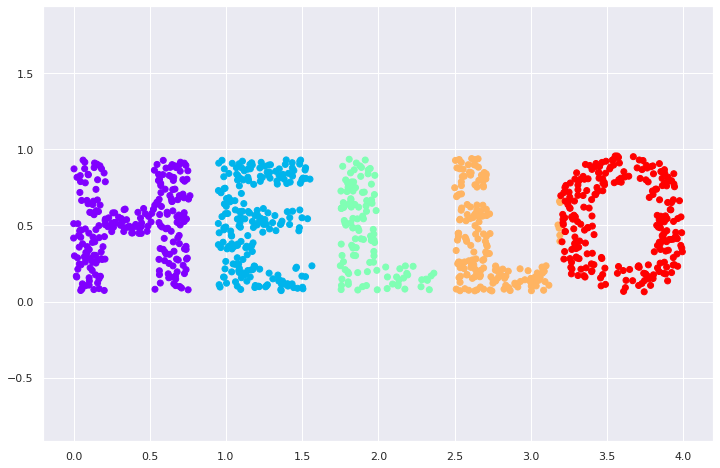

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

Versión rotada

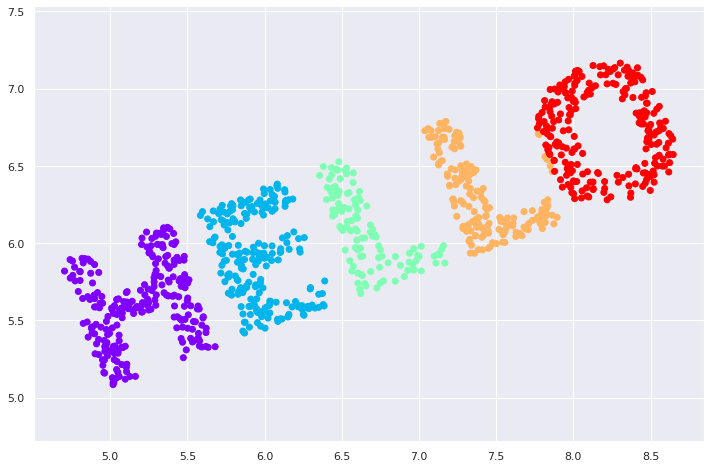

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

Probamos un método lineal

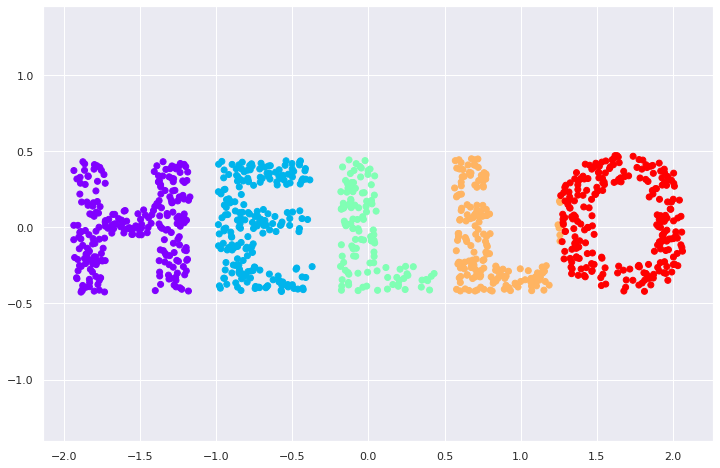

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2).fit(X2)
scores = pca.transform(X2)
plt.scatter(scores[:, 0], scores[:, 1], **colorize)
plt.axis('equal');

Otro método no lineal (que verás próximamente)

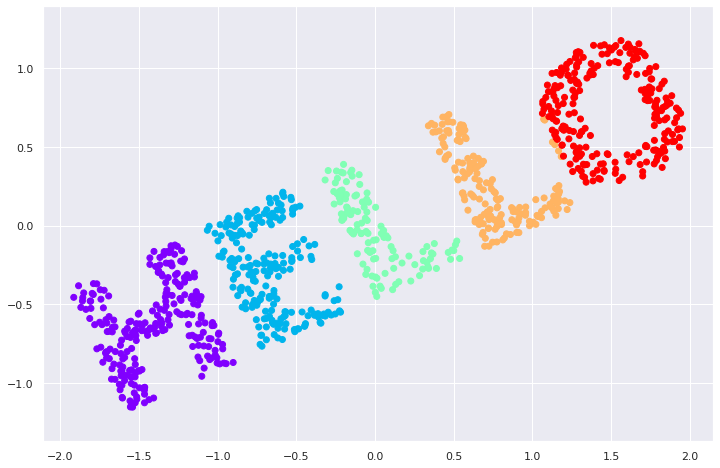

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

Ahora, una versión no-lineal

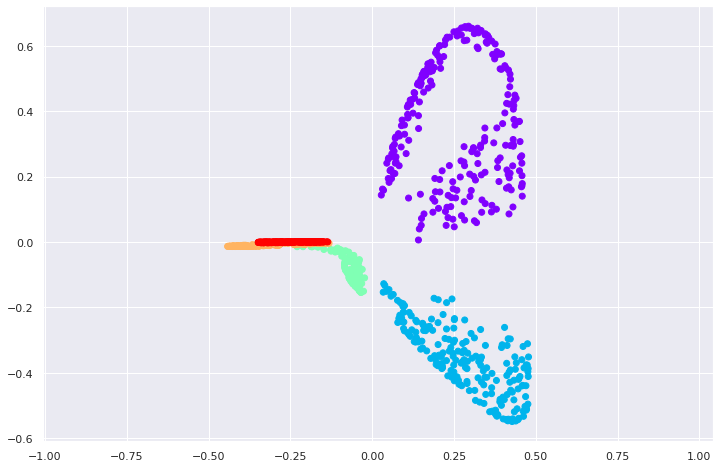

In [ ]:
from sklearn.decomposition import KernelPCA

sigma = .1

# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma).fit(X2)
scores = kpca.transform(X2)
plt.scatter(scores[:, 0], scores[:, 1], **colorize)
plt.axis('equal');

Ahora, veamos un caso donde los métodos lineales fallan

In [ ]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

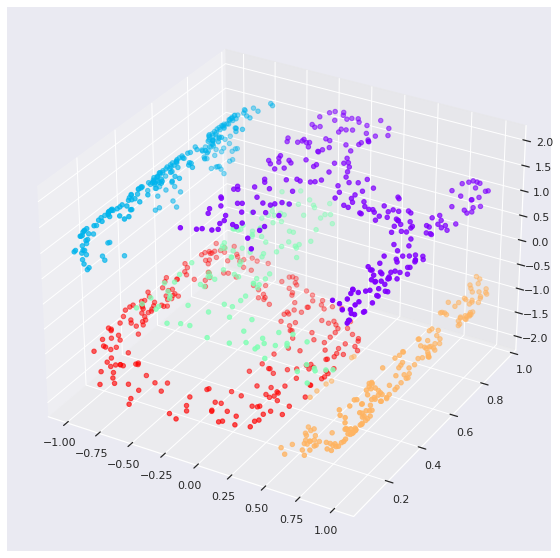

In [ ]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

Kernel PCA y PCA

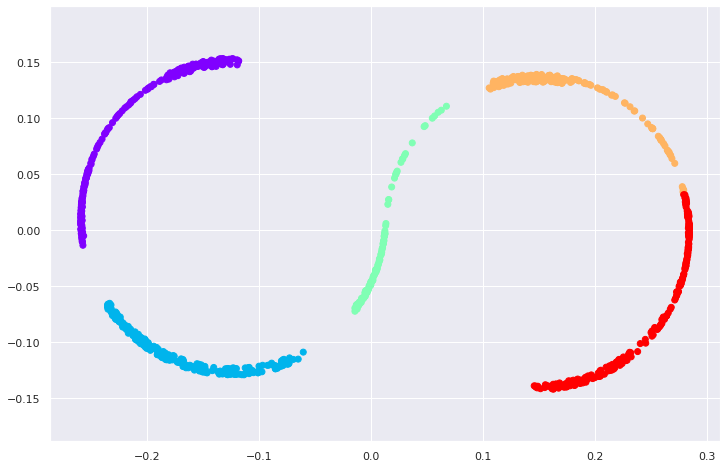

In [ ]:
sigma = 100
#sigma = 300 #PCA

# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma).fit(XS)
scores = kpca.transform(XS)
plt.scatter(scores[:, 0], scores[:, 1], **colorize)
plt.axis('equal');

Probemos t-SNE

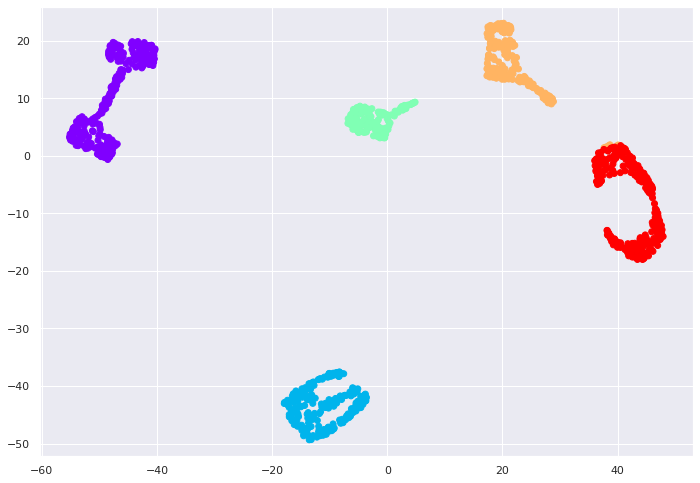

In [ ]:
from sklearn.manifold import TSNE
perp = 50
tsne = TSNE(init = 'pca', perplexity=perp, n_iter=10500, n_iter_without_progress=150, n_jobs=2, random_state=0)
tsne_emb = tsne.fit_transform(XS)

plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1], **colorize)
plt.axis('equal');


## t-SNE. Ejemplo 2

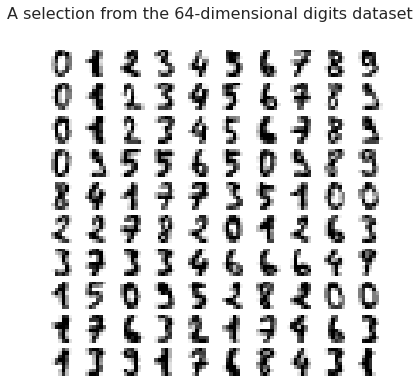

In [ ]:
from sklearn.datasets import load_digits
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

X, y = load_digits(return_X_y=True)

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

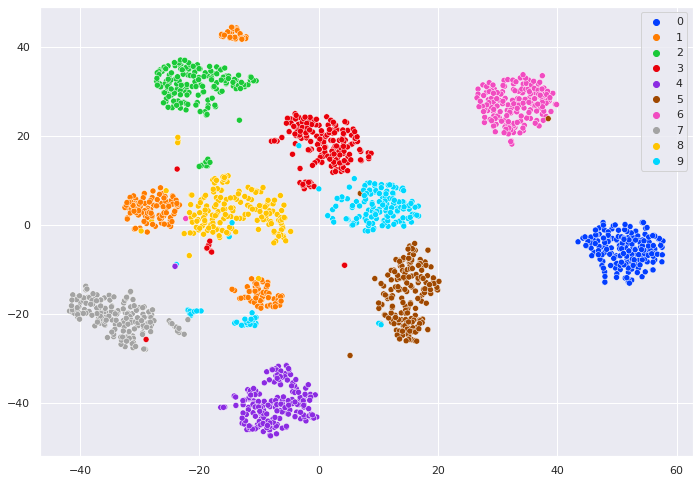

In [ ]:
n_comp = 2
perp = 50
tsne = TSNE(n_components=n_comp, perplexity=perp)
X_embedded = tsne.fit_transform(X)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette);